### Training a Sarcasm Detection Model using a Convolution Layer

### Download the Dataset

In [1]:
import json

with open('/Users/niloufar/Desktop/DeepLearning/tf_specialization/dataset/sarcasm.json', 'r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    

### Split the Dataset

In [4]:
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

### Data preprocessing

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

### Build and Compile the Model

In [8]:
import tensorflow as tf

embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
________________________________________________

### Train the Model

In [9]:
NUM_EPOCHS = 10

history_conv = model_conv.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10


2023-05-28 11:11:38.243932: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 2s 3ms/step - loss: 0.5302 - accuracy: 0.7513 - val_loss: 0.4495 - val_accuracy: 0.8378
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3232 - accuracy: 0.8848 - val_loss: 0.3780 - val_accuracy: 0.8435
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1797 - accuracy: 0.9358 - val_loss: 0.3976 - val_accuracy: 0.8430
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0991 - accuracy: 0.9695 - val_loss: 0.4879 - val_accuracy: 0.8386
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0479 - accuracy: 0.9869 - val_loss: 0.5932 - val_accuracy: 0.8383
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0242 - accuracy: 0.9941 - val_loss: 0.6895 - val_accuracy: 0.8298
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0106 - accuracy: 0.9974 - val_loss: 0.8031 - val_accuracy: 0.8310
Epoch 8/10
625/62

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

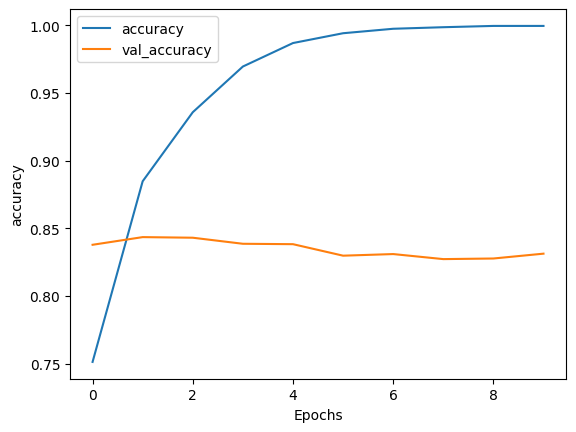

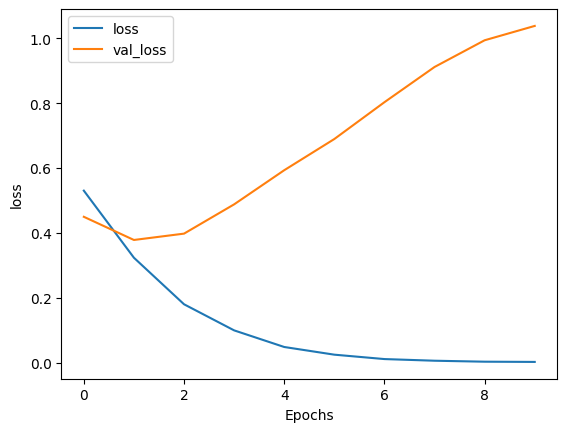

In [11]:
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')